In [1]:
import pandas as pd

In [11]:
df = pd.read_html('http://edicni-plan.euromedia.cz')[0]
df.head()

,Název knihy,Autor,Žánr,MOC,Nakladatel,Datum vydání,Číslo titulu
0,"Tancuj, tancuj, tancuj - audioknihovna",Murakami Haruki,Česká literatura,399 Kč,Témbr,30. 06. 2021,41945
1,Život není skákací hrad,Hülsmannová Petra,Beletrie pro dospělé,399 Kč,Ikar,01. 07. 2021,41815
2,Vzpurná dcera,Banov Kaufmann Lori,Beletrie pro dospělé,359 Kč,Ikar,01. 07. 2021,41943
3,Nebezpečná místa,Gibneyová Patricia,Beletrie pro dospělé,399 Kč,Kalibr,01. 07. 2021,42027
4,"Za války, 1918: Příslib naděje",Harrod-Eagles Cynthia,Beletrie pro dospělé,399 Kč,Brána,01. 07. 2021,42152


In [4]:
print(df.columns)

Index(['Název knihy', 'Autor', 'Žánr', 'MOC', 'Nakladatel', 'Datum vydání',
       'Číslo titulu'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Název knihy   704 non-null    object        
 1   Autor         704 non-null    object        
 2   Žánr          704 non-null    object        
 3   MOC           704 non-null    float64       
 4   Nakladatel    704 non-null    object        
 5   Datum vydání  704 non-null    datetime64[ns]
 6   Číslo titulu  704 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 38.6+ KB


In [19]:
def convert_date(datum_vydani):
    rok = datum_vydani.split()[2] + '-'
    mesic = datum_vydani.split()[1].replace('.', '-')
    den = datum_vydani.split()[0].replace('.', '')
    return rok + mesic + den


df['Datum vydání'] = df['Datum vydání'].apply(lambda x: convert_date(x))
df['Datum vydání'] = pd.to_datetime(df['Datum vydání'])
df['MOC'] = df['MOC'].replace({' Kč': ''}, regex=True).astype('float')

In [23]:
df.head()

,Název knihy,Autor,Žánr,MOC,Nakladatel,Datum vydání,Číslo titulu
0,"Tancuj, tancuj, tancuj - audioknihovna",Murakami Haruki,Česká literatura,399.0,Témbr,2021-06-30,41945
1,Život není skákací hrad,Hülsmannová Petra,Beletrie pro dospělé,399.0,Ikar,2021-07-01,41815
2,Vzpurná dcera,Banov Kaufmann Lori,Beletrie pro dospělé,359.0,Ikar,2021-07-01,41943
3,Nebezpečná místa,Gibneyová Patricia,Beletrie pro dospělé,399.0,Kalibr,2021-07-01,42027
4,"Za války, 1918: Příslib naděje",Harrod-Eagles Cynthia,Beletrie pro dospělé,399.0,Brána,2021-07-01,42152


In [32]:
df.agg({'Datum vydání': ['min', 'max']})

,Datum vydání
min,2021-06-30
max,2026-10-01


prumerna cena knihy vydana v cervenci 2021

In [28]:
selection = (df['Datum vydání'] >= '2021-07-01') & (df['Datum vydání'] <= '2021-07-31')
df.loc[selection, :].agg({'MOC': ['mean', 'count', 'min', 'max'], 'Datum vydání': 'max'})

,MOC,Datum vydání
mean,337.651163,NaT
count,43.000000,NaT
min,0.000000,NaT
max,599.000000,2021-07-28


In [34]:
df.loc[selection & (df.MOC == 0), :]

,Název knihy,Autor,Žánr,MOC,Nakladatel,Datum vydání,Číslo titulu
30,Pedagogický zápisník 2021/2022,Köpplová Pavla,Beletrie pro dospělé,0.0,Universum,2021-07-15,42842
37,Poslední dopis od milence,Moyesová Jojo,Beletrie pro dospělé,0.0,Ikar,2021-07-19,42818


''

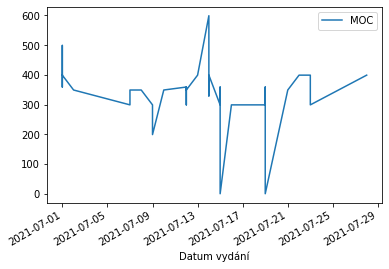

In [36]:
df.loc[selection, :].plot(x='Datum vydání', y='MOC')
;

In [37]:
df.loc[selection, 'Žánr'].unique()

array(['Beletrie pro dospělé', 'Cestování, mapy', 'Česká literatura',
       'Děti do 10 let', 'Populárně naučná pro dospělé',
       'Literatura faktu'], dtype=object)

In [54]:
len(list(df.loc[selection, :]['Autor'].unique()))

39